In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
cards_data = pd.read_excel("data rough/share abc.xlsx",sheet_name=None,dtype={"Card":"object"})

In [8]:
cards_data.keys()

dict_keys(['Day1', 'Day2', 'Illustration'])

In [9]:
day1= cards_data["Day1"]
day2 =cards_data["Day2"]

In [10]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   S.No           796 non-null    int64  
 2   Card           786 non-null    object 
 3   Suits          786 non-null    object 
 4   Card Category  796 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 31.2+ KB


In [11]:
day1.head()

,Unnamed: 0,S.No,Card,Suits,Card Category
0,NaN,1,12,i,C
1,NaN,1,2,d,A
2,NaN,1,11,d,C
3,NaN,1,10,d,B
4,NaN,1,12,c,C


In [12]:
day1.columns

Index(['Unnamed: 0', 'S.No', 'Card', 'Suits', 'Card Category'], dtype='object')

In [13]:
day1.drop("Unnamed: 0",axis=1, inplace =True);

In [14]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.No           796 non-null    int64 
 1   Card           786 non-null    object
 2   Suits          786 non-null    object
 3   Card Category  796 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.0+ KB


In [15]:
day1["card1"] = day1["Card"].replace([1,11,12,13],["ace","jak","queen","king"])

In [16]:
day1["card1"]

0      queen
1          2
2        jak
3         10
4      queen
       ...  
791    queen
792      jak
793        3
794        7
795        7
Name: card1, Length: 796, dtype: object

In [17]:
day1["Suits"].replace(["d","i","c","h"],["Hearts","Diamonds","Clubs","Spades"],inplace=True)

In [18]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.No           796 non-null    int64 
 1   Card           786 non-null    object
 2   Suits          786 non-null    object
 3   Card Category  796 non-null    object
 4   card1          786 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.2+ KB


In [19]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.No           796 non-null    int64 
 1   Card           786 non-null    object
 2   Suits          786 non-null    object
 3   Card Category  796 non-null    object
 4   card1          786 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.2+ KB


In [20]:
day1["Card"] = day1.Card.astype("object")

In [21]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.No           796 non-null    int64 
 1   Card           786 non-null    object
 2   Suits          786 non-null    object
 3   Card Category  796 non-null    object
 4   card1          786 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.2+ KB


In [22]:
day1_ind = day1.set_index(["S.No","Suits","card1"])

In [23]:
day1_ind.columns

Index(['Card', 'Card Category'], dtype='object')

In [24]:
day1_ind.sum(level=2).Card

C:\Users\ACER\AppData\Local\Temp\ipykernel_12796\4243505495.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  day1_ind.sum(level=2).Card


card1
queen    708
2        112
jak      638
10       640
4        228
6        390
9        522
ace       65
8        504
3        171
5        310
7        490
king     676
Name: Card, dtype: int64

<AxesSubplot: xlabel='Card', ylabel='Card Category'>

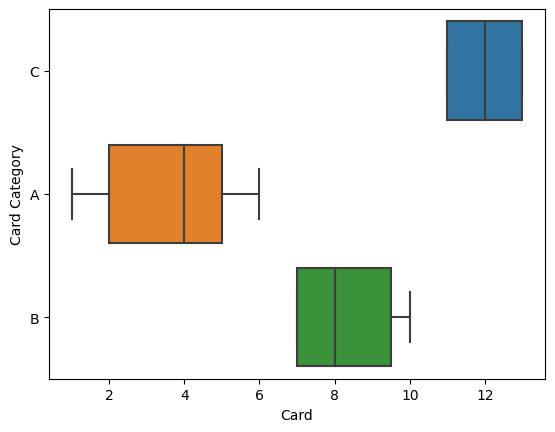

In [28]:
sns.boxplot(y="Card Category",x="Card",data=day1_ind)
#plt.savefig("data rough/box.png")

C:\Users\ACER\AppData\Local\Temp\ipykernel_12796\1477430241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day1_ind['Card'])


<AxesSubplot: xlabel='Card', ylabel='Density'>

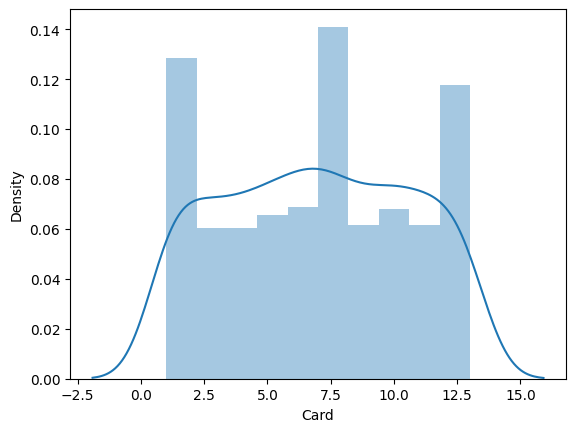

In [30]:
sns.distplot(day1_ind['Card'])
#plt.savefig('data rough/density.png')


In [32]:
day1_ind.head(20)

Card Card Category
S.No Suits    card1                   
1    Diamonds queen   12             C
     Hearts   2        2             A
              jak     11             C
              10      10             B
     Clubs    queen   12             C
     Diamonds 4        4             A
     Spades   4        4             A
     Clubs    10      10             B
     Spades   jak     11             C
     Hearts   6        6             A
     Spades   6        6             A
              9        9             B
     Clubs    ace      1             A
     Diamonds 8        8             B
     Hearts   jak     11             C
     Spades   ace      1             A
     Diamonds 2        2             A
     Spades   10      10             B
              3        3             A
     Clubs    4        4             A

ValueError: could not convert string to float: 'C'

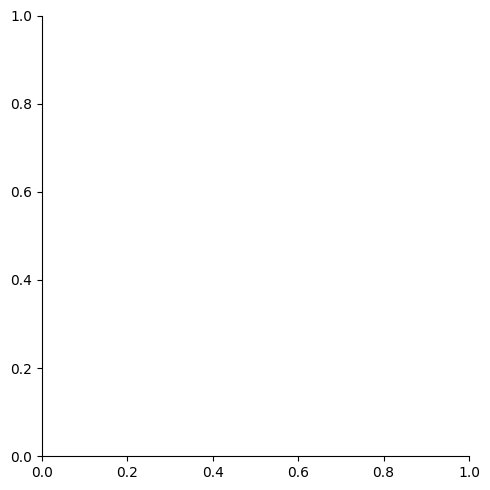

In [27]:
sns.lmplot(y="Card Category",x="Card",data=day1_ind)

In [33]:
total_cards_delth =day1_ind["Card"].sum()

Percentage Calculation :

In [34]:
day1_ind["perc"] = (day1_ind["Card"]/total_cards_delth)*100

In [35]:
day1_ind.sum(level=1).perc

C:\Users\ACER\AppData\Local\Temp\ipykernel_12796\3787744455.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  day1_ind.sum(level=1).perc


Suits
Diamonds    24.734140
Hearts      22.955629
Clubs       28.071140
Spades      24.239091
Name: perc, dtype: float64

In [38]:
day1_ind.head()

Card Card Category      perc
S.No Suits    card1                             
1    Diamonds queen   12             C  0.220022
     Hearts   2        2             A   0.03667
              jak     11             C  0.201687
              10      10             B  0.183352
     Clubs    queen   12             C  0.220022

In [39]:
day1_ind.groupby("S.No")["card1"].value_counts()

KeyError: 'Column not found: card1'

In [40]:
percentage = []
for car in day1_ind.sum(level=2).Card:
    p = 

SyntaxError: invalid syntax (2798753163.py, line 3)